<a href="https://colab.research.google.com/github/huak95/pattern_2022/blob/main/HW01_Clustering_and_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

# 1. Clustering

In [338]:
x = [1, 3, 2, 8, 6, 7, -3, -2, -7]
y = [2, 3, 2, 8, 6, 7, -3, -4, -7]
df = pd.DataFrame({'X': x, 'Y': y})

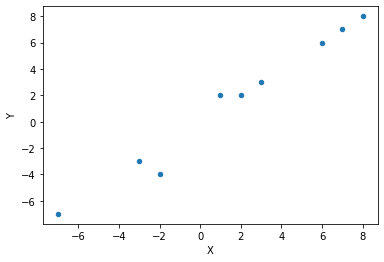

In [340]:
df.plot.scatter(x='X', y='Y')

In [357]:
class KMeans_Harry:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    @staticmethod
    def euclidean(point, data):
        return np.sqrt(np.sum((point - data)**2, axis=1))

    def fit(self, X_train, centroids=None):
        X_train = np.array(X_train)
        # Select centroid from max, min of data
        min_, max_ = np.min(X_train, axis=0), np.max(X_train, axis=0)
        if centroids == None:
            self.centroids = np.array([np.random.uniform(min_, max_) for _ in range(self.n_clusters)])
        else:
            self.centroids = centroids
        print("self.centroids",self.centroids)
        # centroids = [[x1, y1], [x2, y2]]

        # initialize
        iter = 0
        prev_centroids = None

        # for iter in range(self.max_iter):
        while np.not_equal(self.centroids, prev_centroids).any() and iter < self.max_iter:

            # Sort each data point, assigning to nearest centroid
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                # print(x, self.centroids)
                dists = self.euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)
            # sorted_points = return all points with centroid point
            # [[array([1, 2]), array([3, 3]), array([2, 2])], 
            #  [array([8, 8]), array([6, 6]), array([7, 7])], 
            #  [array([-3, -3]), array([-2, -4]), array([-7, -7])]]
            # |
            # V
            # Mean 
            # [array([ 0., -1.]), array([6., 6.]), array([-3.        , -2.67])]

            # Find new centroids
            prev_centroids = copy.deepcopy(self.centroids)
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]

            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points (Deny error when looping)
                    self.centroids[i] = prev_centroids[i]
                    
            iter += 1

        self.centroid_, self.labels_ = self.evaluate(X_train)

    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        
        return centroids, centroid_idxs



self.centroids [[3, 3], [2, 2], [-3, -3]]


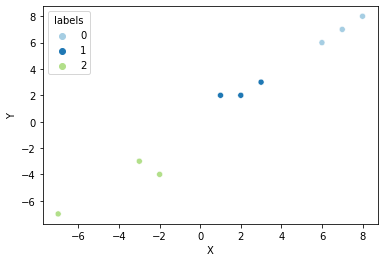

In [365]:
km = KMeans_Harry(n_clusters=3, max_iter=300)
centroids=[[3, 3], [2,2], [-3,-3]]
km.fit(df.values, centroids)

df_ans = df.copy()
df_ans['labels'] = km.labels_
sns.scatterplot(data=df_ans, x='X', y='Y', hue='labels', palette='Paired')

self.centroids [[-3, -3], [2, 2], [-7, -7]]


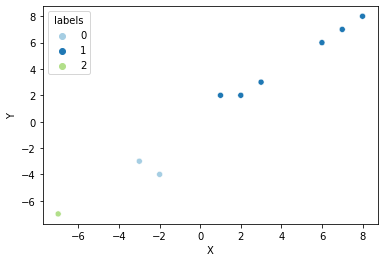

In [366]:
km = KMeans_Harry(n_clusters=3, max_iter=300)
centroids=[[-3, -3], [2,2], [-7,-7]]
km.fit(df.values, centroids)

df_ans = df.copy()
df_ans['labels'] = km.labels_
sns.scatterplot(data=df_ans, x='X', y='Y', hue='labels', palette='Paired')

,x,y,labels
0,1,2,2
1,3,3,2
2,2,2,2
3,8,8,3
4,6,6,3
5,7,7,3
6,-3,-3,0
7,-2,-4,0
8,-7,-7,4
